In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [4]:
data = pd.read_csv('stocks.csv')
cl = data[data['Name']=='MMM'].close

In [6]:
scl = MinMaxScaler()
#Scale the data
cl = cl.values.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

In [7]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [8]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [9]:
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [10]:
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0026 - val_loss: 0.0101
Epoch 2/300
1000/1000 [==============================] - 0s 491us/step - loss: 0.0081 - val_loss: 0.0022
Epoch 3/300
1000/1000 [==============================] - 1s 525us/step - loss: 0.0032 - val_loss: 9.6548e-04
Epoch 4/300
1000/1000 [==============================] - 1s 519us/step - loss: 4.1327e-04 - val_loss: 0.0014
Epoch 5/300
1000/1000 [==============================] - 1s 548us/step - loss: 3.5610e-04 - val_loss: 7.6502e-04
Epoch 6/300
1000/1000 [==============================] - 0s 440us/step - loss: 5.6130e-04 - val_loss: 6.0731e-04
Epoch 7/300
1000/1000 [==============================] - 1s 503us/step - loss: 3.5725e-04 - val_loss: 9.6752e-04
Epoch 8/300
1000/1000 [==============================] - 0s 442us/step - loss: 4.3908e-04 - val_loss: 0.0011
Epoch 9/300
1000/1000 [==============================] - 0s 447us/step - loss: 

1000/1000 [==============================] - 1s 532us/step - loss: 2.2459e-04 - val_loss: 0.0017
Epoch 76/300
1000/1000 [==============================] - 0s 500us/step - loss: 2.2275e-04 - val_loss: 0.0017
Epoch 77/300
1000/1000 [==============================] - 1s 516us/step - loss: 2.2156e-04 - val_loss: 0.0017
Epoch 78/300
1000/1000 [==============================] - 0s 499us/step - loss: 2.1962e-04 - val_loss: 0.0017
Epoch 79/300
1000/1000 [==============================] - 1s 513us/step - loss: 2.1821e-04 - val_loss: 0.0017
Epoch 80/300
1000/1000 [==============================] - 0s 483us/step - loss: 2.1626e-04 - val_loss: 0.0017
Epoch 81/300
1000/1000 [==============================] - 1s 507us/step - loss: 2.1494e-04 - val_loss: 0.0017
Epoch 82/300
1000/1000 [==============================] - 0s 472us/step - loss: 2.1303e-04 - val_loss: 0.0016
Epoch 83/300
1000/1000 [==============================] - 0s 492us/step - loss: 2.1173e-04 - val_loss: 0.0016
Epoch 84/300
1000/1000 

1000/1000 [==============================] - 0s 491us/step - loss: 1.6932e-04 - val_loss: 0.0014
Epoch 150/300
1000/1000 [==============================] - 1s 551us/step - loss: 1.1649e-04 - val_loss: 0.0011
Epoch 151/300
1000/1000 [==============================] - 1s 556us/step - loss: 1.2117e-04 - val_loss: 0.0010
Epoch 152/300
1000/1000 [==============================] - 1s 561us/step - loss: 1.1719e-04 - val_loss: 9.3599e-04
Epoch 153/300
1000/1000 [==============================] - 0s 494us/step - loss: 1.1335e-04 - val_loss: 8.6383e-04
Epoch 154/300
1000/1000 [==============================] - 0s 497us/step - loss: 1.1175e-04 - val_loss: 8.1767e-04
Epoch 155/300
1000/1000 [==============================] - 0s 420us/step - loss: 1.0977e-04 - val_loss: 7.7908e-04
Epoch 156/300
1000/1000 [==============================] - 0s 411us/step - loss: 1.0845e-04 - val_loss: 7.5281e-04
Epoch 157/300
1000/1000 [==============================] - 0s 480us/step - loss: 1.0749e-04 - val_loss: 7.

1000/1000 [==============================] - 0s 459us/step - loss: 1.3363e-04 - val_loss: 8.2717e-04
Epoch 221/300
1000/1000 [==============================] - 0s 419us/step - loss: 1.3359e-04 - val_loss: 8.2527e-04
Epoch 222/300
1000/1000 [==============================] - 0s 411us/step - loss: 1.3334e-04 - val_loss: 8.2444e-04
Epoch 223/300
1000/1000 [==============================] - 0s 494us/step - loss: 1.3333e-04 - val_loss: 8.2253e-04
Epoch 224/300
1000/1000 [==============================] - 0s 435us/step - loss: 1.3315e-04 - val_loss: 8.2126e-04
Epoch 225/300
1000/1000 [==============================] - 0s 467us/step - loss: 1.3319e-04 - val_loss: 8.1984e-04
Epoch 226/300
1000/1000 [==============================] - 0s 414us/step - loss: 1.3291e-04 - val_loss: 8.1919e-04
Epoch 227/300
1000/1000 [==============================] - 0s 467us/step - loss: 1.3289e-04 - val_loss: 8.1725e-04
Epoch 228/300
1000/1000 [==============================] - 0s 431us/step - loss: 1.3263e-04 - 

Epoch 292/300
1000/1000 [==============================] - 0s 471us/step - loss: 1.1095e-04 - val_loss: 7.5606e-04
Epoch 293/300
1000/1000 [==============================] - 1s 527us/step - loss: 1.1219e-04 - val_loss: 7.6060e-04
Epoch 294/300
1000/1000 [==============================] - 0s 495us/step - loss: 1.1325e-04 - val_loss: 7.6569e-04
Epoch 295/300
1000/1000 [==============================] - 1s 536us/step - loss: 1.1439e-04 - val_loss: 7.7054e-04
Epoch 296/300
1000/1000 [==============================] - 1s 557us/step - loss: 1.1538e-04 - val_loss: 7.7526e-04
Epoch 297/300
1000/1000 [==============================] - 1s 613us/step - loss: 1.1634e-04 - val_loss: 7.7863e-04
Epoch 298/300
1000/1000 [==============================] - 1s 509us/step - loss: 1.1709e-04 - val_loss: 7.8237e-04
Epoch 299/300
1000/1000 [==============================] - 1s 515us/step - loss: 1.1789e-04 - val_loss: 7.8546e-04
Epoch 300/300
1000/1000 [==============================] - 1s 549us/step - loss:

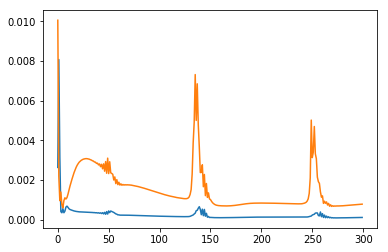

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [18]:
act = []
pred = []
for i in range(250):
#i=249
    Xt = model.predict(X_test[i].reshape(1,7,1))
    print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
    pred.append(scl.inverse_transform(Xt))
    act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[176.79274]], actual:[[177.07]]
predicted:[[178.04298]], actual:[[178.18]]
predicted:[[179.12558]], actual:[[179.]]
predicted:[[179.89323]], actual:[[181.02]]
predicted:[[181.77419]], actual:[[181.6]]
predicted:[[182.32541]], actual:[[181.7]]
predicted:[[182.382]], actual:[[183.41]]
predicted:[[183.93109]], actual:[[182.95]]
predicted:[[183.51541]], actual:[[183.37]]
predicted:[[183.88156]], actual:[[186.04]]
predicted:[[186.37398]], actual:[[187.19]]
predicted:[[187.50717]], actual:[[187.41]]
predicted:[[187.70862]], actual:[[186.91]]
predicted:[[187.16417]], actual:[[186.35]]
predicted:[[186.56482]], actual:[[189.86]]
predicted:[[189.83905]], actual:[[189.89]]
predicted:[[189.95575]], actual:[[189.31]]
predicted:[[189.42635]], actual:[[188.9]]
predicted:[[188.93718]], actual:[[189.09]]
predicted:[[189.07297]], actual:[[189.51]]
predicted:[[189.48877]], actual:[[189.9]]
predicted:[[189.9008]], actual:[[191.21]]
predicted:[[191.12373]], actual:[[191.52]]
predicted:[[191.4071

In [19]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

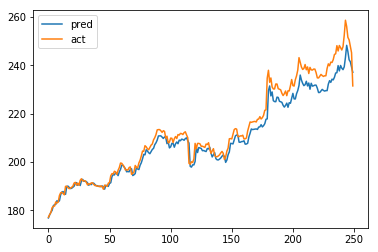

In [20]:
result_df.plot(kind='line')

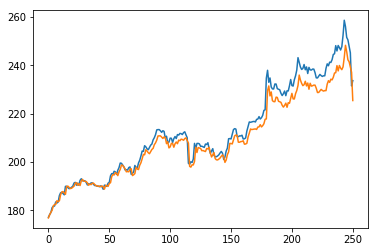

In [17]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))